# Setup

In [1]:
!pip install -q condacolab

import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change version of CUDA

In [ ]:
%cd /usr/local/

/usr/local


In [ ]:
%ls

bin/    cuda-11@    games/               lib/        man@    src/
colab/  cuda-11.8/  _gcs_config_ops.so/  lib64/      sbin/
cuda@   etc/        include/             licensing/  share/


In [ ]:
!rm -rf cuda
!ln -s /usr/local/cuda-11.8 /usr/local/cuda

In [ ]:
!stat cuda

  File: cuda -> /usr/local/cuda-11.8
  Size: 20        	Blocks: 0          IO Block: 4096   symbolic link
Device: 30h/48d	Inode: 1441931     Links: 1
Access: (0777/lrwxrwxrwx)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2023-07-09 07:13:59.042076921 +0000
Modify: 2023-07-09 07:13:58.936066522 +0000
Change: 2023-07-09 07:13:58.936066522 +0000
 Birth: -


In [2]:
%cd /content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers

/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers


In [ ]:
import os
print(os.getcwd())  # prints the current working directory
print(os.listdir())  # prints the list of files in the current directory

/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers
['.git', 'README.md', 'assets', 'config_pnp.yaml', 'data', 'pnp.py', 'pnp_utils.py', 'requirements.txt', 'condacolab_install.log', 'imagic-tedbench', '.gitmodules', '__pycache__', 'error_log.txt', 'preprocess.py']


## Conda

In [ ]:
condacolab.check()

✨🍰✨ Everything looks OK!


In [3]:
!conda create -n pnp-diffusers python=3.9

Solving environment: \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /usr/local/envs/pnp-diffusers

  added / updated specs:
    - python=3.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.5.7   |       hbcca054_0         145 KB  conda-forge
    libgcc-ng-13.1.0           |       he5830b7_0         758 KB  conda-forge
    libgomp-13.1.0             |       he5830b7_0         409 KB  conda-forge
    libsqlite-3.42.0           |       h2797004_0         809 KB  conda-forge
    libzlib-1.2.13             |       hd590300_5          60 KB  conda-forge
    ncurses-6.4   

In [ ]:
!source activate pnp-diffusers

In [4]:
!source activate pnp-diffusers && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Extraer nombre de las imagenes

In [ ]:
import json

# Lee el archivo JSON
with open('/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/imagic-tedbench/tedbench/input_list.json') as file:
    data = json.load(file)

root_image_path = "/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/imagic-tedbench/tedbench/originals"
# Extrae los valores únicos de img_name
img_names = set(root_image_path + '/' + entry['img_name'] for entry in data)

# Construye una lista de imágenes únicas
image_list = " ".join(list(img_names))


# Train

In [ ]:
!source activate pnp-diffusers && python preprocess.py --data_path {image_list}

Se han truncado las últimas 5000 líneas del flujo de salida.
 41% 407/999 [01:59<02:54,  3.40it/s]
 41% 408/999 [01:59<02:53,  3.41it/s]
 41% 409/999 [02:00<02:53,  3.40it/s]
 41% 410/999 [02:00<02:53,  3.40it/s]
 41% 411/999 [02:00<02:53,  3.40it/s]
 41% 412/999 [02:00<02:52,  3.40it/s]
 41% 413/999 [02:01<02:52,  3.39it/s]
 41% 414/999 [02:01<02:52,  3.39it/s]
 42% 415/999 [02:01<02:52,  3.40it/s]
 42% 416/999 [02:02<02:51,  3.40it/s]
 42% 417/999 [02:02<02:51,  3.39it/s]
 42% 418/999 [02:02<02:51,  3.40it/s]
 42% 419/999 [02:02<02:51,  3.39it/s]
 42% 420/999 [02:03<02:50,  3.40it/s]
 42% 421/999 [02:03<02:49,  3.40it/s]
 42% 422/999 [02:03<02:49,  3.40it/s]
 42% 423/999 [02:04<02:49,  3.40it/s]
 42% 424/999 [02:04<02:49,  3.40it/s]
 43% 425/999 [02:04<02:48,  3.41it/s]
 43% 426/999 [02:05<02:47,  3.41it/s]
 43% 427/999 [02:05<02:47,  3.41it/s]
 43% 428/999 [02:05<02:48,  3.39it/s]
 43% 429/999 [02:05<02:47,  3.40it/s]
 43% 430/999 [02:06<02:47,  3.39it/s]
 43% 431/999 [02:06<02:47, 

In [ ]:
!source activate pnp-diffusers && python pnp.py --config_path "/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/config_pnp.yaml"

{'seed': 1, 'device': 'cuda', 'output_path': 'PNP-results/horse', 'image_path': 'data/horse.jpg', 'latents_path': 'latents_forward', 'sd_version': '2.1', 'guidance_scale': 7.5, 'n_timesteps': 50, 'prompt': 'a photo of a pink toy horse on the beach', 'negative_prompt': 'ugly, blurry, black, low res, unrealistic', 'pnp_attn_t': 0.5, 'pnp_f_t': 0.8}
Loading SD model
Fetching 13 files:   0% 0/13 [00:00<?, ?it/s]



Fetching 13 files:   8% 1/13 [00:00<00:08,  1.45it/s]

































































































































































































































Fetching 13 files:  38% 5/13 [00:18<00:30,  3.81s/it]






































































Fetching 13 files: 100% 13/13 [00:37<00:00,  2.88s/it]
SD model loaded
Sampling: 100% 50/50 [00:36<00:00,  1.36it/s]


## Other

In [ ]:
%ls configs

In [13]:
%cat configs/new_cat_3A_photo_of_a_sleepin.yaml

seed: 1
device: 'cuda'
output_path: 'PNP-results/new_cat_3'

# data
image_path: 'imagic-tedbench/tedbench/originals/new_cat_3.jpeg'
latents_path: 'latents_forward'

# diffusion
sd_version: '2.1'
guidance_scale: 7.5
n_timesteps: 100
prompt: A photo of a sleeping cat.
negative_prompt: realistic

# pnp injection thresholds, ∈ [0, 1]
pnp_attn_t: 0.5
pnp_f_t: 0.8

In [14]:
!source activate pnp-diffusers && python pnp.py --config_path "/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/configs/new_cat_3A_photo_of_a_sleepin.yaml"

{'seed': 1, 'device': 'cuda', 'output_path': 'PNP-results/new_cat_3', 'image_path': 'imagic-tedbench/tedbench/originals/new_cat_3.jpeg', 'latents_path': 'latents_forward', 'sd_version': '2.1', 'guidance_scale': 7.5, 'n_timesteps': 100, 'prompt': 'A photo of a sleeping cat.', 'negative_prompt': 'realistic', 'pnp_attn_t': 0.5, 'pnp_f_t': 0.8}
Loading SD model
SD model loaded
Sampling: 100% 100/100 [02:34<00:00,  1.55s/it]


In [15]:
!source activate pnp-diffusers && python pnp.py --config_path "/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/configs/boxA_photo_of_an_open_b.yaml"

{'seed': 1, 'device': 'cuda', 'output_path': 'PNP-results/box', 'image_path': 'imagic-tedbench/tedbench/originals/box.jpeg', 'latents_path': 'latents_forward', 'sd_version': '2.1', 'guidance_scale': 7.5, 'n_timesteps': 100, 'prompt': 'A photo of an open box.', 'negative_prompt': 'realistic', 'pnp_attn_t': 0.5, 'pnp_f_t': 0.8}
Loading SD model
SD model loaded
Sampling: 100% 100/100 [02:38<00:00,  1.59s/it]


In [16]:
!source activate pnp-diffusers && python pnp.py --config_path "/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/configs/open_bookA_photo_of_a_closed_.yaml"

{'seed': 1, 'device': 'cuda', 'output_path': 'PNP-results/open_book', 'image_path': 'imagic-tedbench/tedbench/originals/open_book.jpeg', 'latents_path': 'latents_forward', 'sd_version': '2.1', 'guidance_scale': 7.5, 'n_timesteps': 100, 'prompt': 'A photo of a closed book.', 'negative_prompt': 'realistic', 'pnp_attn_t': 0.5, 'pnp_f_t': 0.8}
Loading SD model
SD model loaded
Sampling: 100% 100/100 [02:33<00:00,  1.54s/it]


In [17]:
!source activate pnp-diffusers && python pnp.py --config_path "/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/configs/white_horse2A_circus_horse..yaml"

{'seed': 1, 'device': 'cuda', 'output_path': 'PNP-results/white_horse2', 'image_path': 'imagic-tedbench/tedbench/originals/white_horse2.png', 'latents_path': 'latents_forward', 'sd_version': '2.1', 'guidance_scale': 7.5, 'n_timesteps': 100, 'prompt': 'A circus horse.', 'negative_prompt': 'realistic', 'pnp_attn_t': 0.5, 'pnp_f_t': 0.8}
Loading SD model
SD model loaded
Sampling: 100% 100/100 [02:33<00:00,  1.53s/it]


In [18]:
!source activate pnp-diffusers && python pnp.py --config_path "/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/configs/tree_1A_photo_of_a_willow_.yaml"

{'seed': 1, 'device': 'cuda', 'output_path': 'PNP-results/tree_1', 'image_path': 'imagic-tedbench/tedbench/originals/tree_1.jpeg', 'latents_path': 'latents_forward', 'sd_version': '2.1', 'guidance_scale': 7.5, 'n_timesteps': 100, 'prompt': 'A photo of a willow tree.', 'negative_prompt': 'realistic', 'pnp_attn_t': 0.5, 'pnp_f_t': 0.8}
Loading SD model
SD model loaded
Sampling: 100% 100/100 [02:34<00:00,  1.54s/it]


In [19]:
!source activate pnp-diffusers && python pnp.py --config_path "/content/drive/MyDrive/ColabStorage/plugAndPlayDif/pnp-diffusers/configs/dog_01A_photo_of_a_jumping.yaml"

{'seed': 1, 'device': 'cuda', 'output_path': 'PNP-results/dog_01', 'image_path': 'imagic-tedbench/tedbench/originals/dog_01.jpeg', 'latents_path': 'latents_forward', 'sd_version': '2.1', 'guidance_scale': 7.5, 'n_timesteps': 100, 'prompt': 'A photo of a jumping dog.', 'negative_prompt': 'realistic', 'pnp_attn_t': 0.5, 'pnp_f_t': 0.8}
Loading SD model
SD model loaded
Sampling: 100% 100/100 [02:34<00:00,  1.55s/it]


In [ ]:
!pip install matplotlib

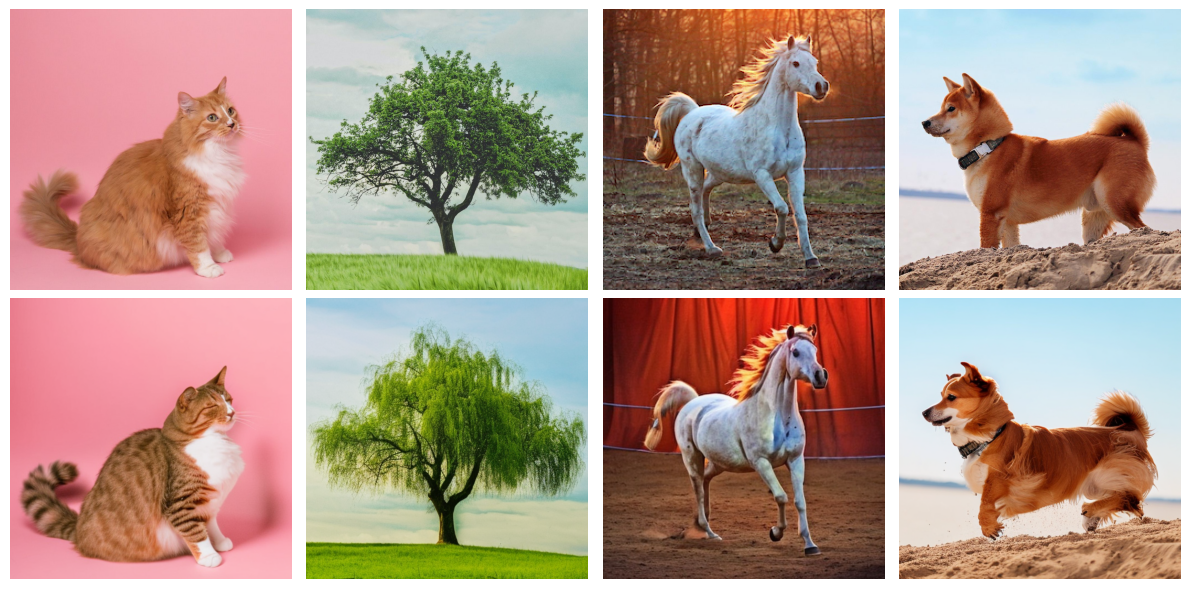

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

# Datos de ejemplo (puedes reemplazarlos con tus propias imágenes)
imagenes = ["imagic-tedbench/tedbench/originals/new_cat_3.jpeg","imagic-tedbench/tedbench/originals/tree_1.jpeg","imagic-tedbench/tedbench/originals/white_horse2.png","imagic-tedbench/tedbench/originals/dog_01.jpeg",
            "PNP-results/new_cat_3/output-A photo of a sleeping cat..png","PNP-results/tree_1/output-A photo of a willow tree..png","PNP-results/white_horse2/output-A circus horse..png","PNP-results/dog_01/output-A photo of a jumping dog..png"]

# Configuración de la cuadrícula
filas = 2
columnas = 4

# Crear la figura y los ejes
fig, axs = plt.subplots(filas, columnas, figsize=(12, 6))

# Mostrar las imágenes en la cuadrícula
for i, ax in enumerate(axs.flat):
    imagen = Image.open(imagenes[i])
    ax.imshow(imagen)
    ax.axis('off')

# Ajustar el espaciado entre las imágenes
fig.tight_layout()

# Mostrar la figura
plt.show()
